    [ 목차 ]
1. Convolution
2. MNIST
3. Pytorch Visdom
4. Pytorch Datasets , Custom Dataset
5. CIFAR-10
6. VGG & ResNet

# Convolution  Neural Network
- Convolution
- Neuron 과 Convolution
- Pooling

CNN은 이미지를 인식하기 위해 패턴을 찾는데 유용하다.

* CNN 이전

CNN이 나오기 이전에 이미지는 2차원으로 된 이미지를 1차원배열로 바꾼 뒤 Fully Connected 로 학습시켰다. 하지만 이미지 형상이 고려되지 않는 점, 많은 양의 학습데이터 필요, 학습시간이 긴 점, 이미지의 회전 및 움직임을 고려할 수 없는 점 등의 단점이 있다. 즉, 이미지 데이터를 평면화 시키는 과정에서 공간정보가 손실되기 때문에 '이미지 공간정보를 유지한채 학습'하는 CNN 모델이 등장하였다.

* CNN
    - stride : 값을 조정하면서 filter를 옮겨 이미지의 특징을 추출할 수 있다.
    - filter : 여러 개의 필터를 이용해 이미지의 세부 특징을 추출해 학습할 수 있다.
    - channel : 보통 연산량을 줄이기 위해(오차감소) 전처리에서 이미지를 흑백으로 만들어 처리한다.
    
    (흑백)
    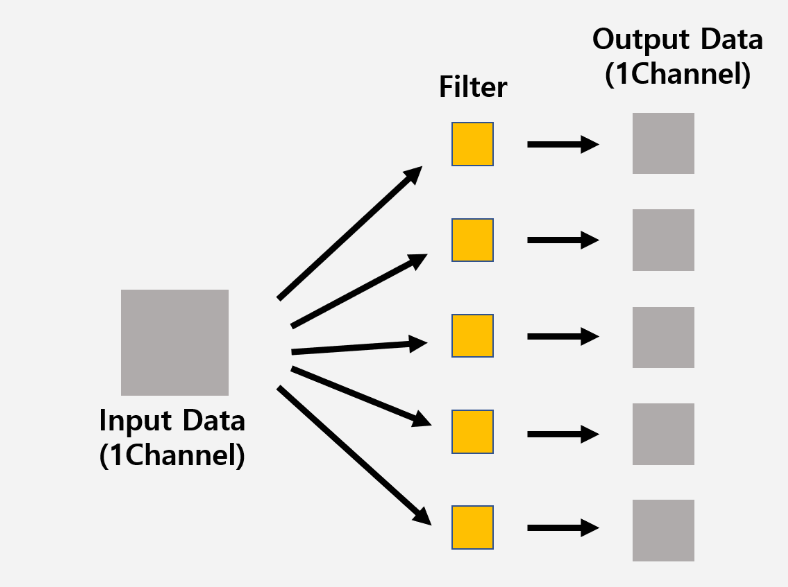
    
    (컬러) = Multi Channel
    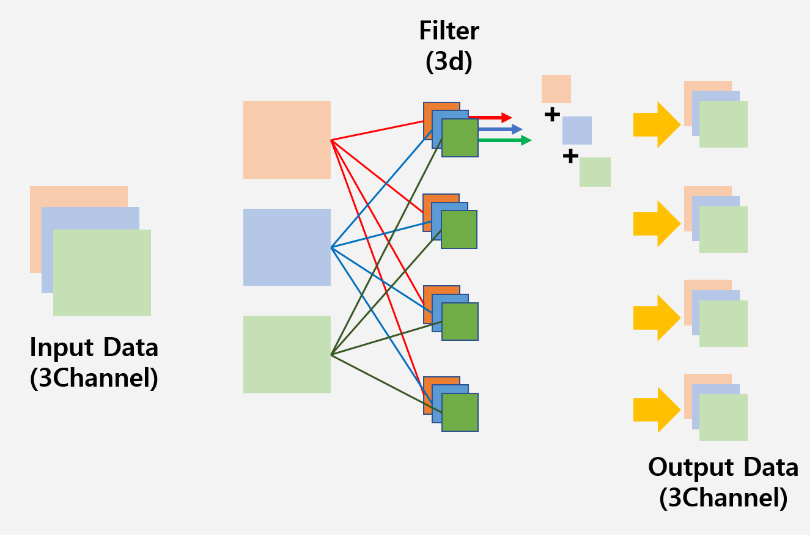
    
    이 때, input data의 channel 수와 filter의 channel수가 같아야 한다.


## Convolution

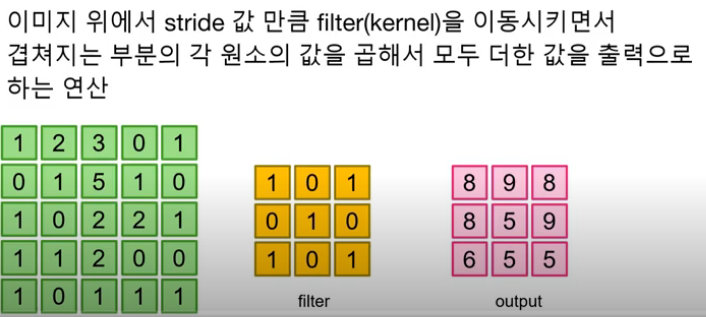

## Stride and Padding

- stride : filter를 몇 칸 이동할 것인가

    연산을 하면 output size가 input size보다 작아지는데, 이를 막기 위해 padding을 사용한다.
    
    
    
- padding : zero-padding( 0으로 둘러싸는 padding, 특징이나 분해능에 영향 x )
    
    valid : padding이 없으므로 입력보다 출력의 크기가 작아진다.
    
    same : padding이 있으므로 입력과 출력의 크기가 같다.



- input
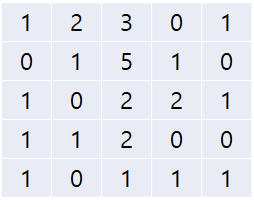


- filter size =  3 x 3
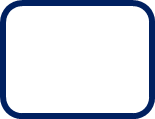


- input, stride = 2
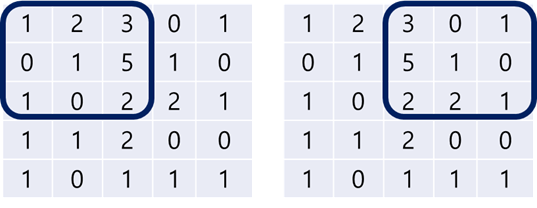



- input, padding = 1
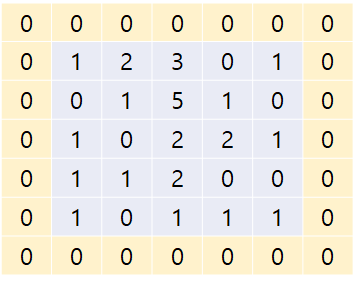

## Pytorch nn.Conv2d

* 함수 사용
torch.nn.Conv2d(in_channels, out_channels, kernal_size, strid=1, padding=0, dilation=1, groups=1, bias=True)


* 입력 형태
    - input type : torch.Tensor
    - input shape : (N X C X H X W) = (batch_size, channel, height, width)


* 출력 형태
    - output size = (input size - filter size + 2* padding) / stride + 1
    

## 실습
input image size, filter size, strid, padding 값에 따른 ouputsize 확인하기

In [4]:
import torch
import torch.nn as nn

### 예제 1

In [7]:
# filter 생성
conv = nn.Conv2d(1, 1, 11, stride=4, padding=0)

# input
inputs = torch.Tensor(1, 1, 227, 227)

# output
out = conv(inputs)
out.shape

torch.Size([1, 1, 55, 55])

### 예제 2 
계산값이 소수점인 경우, 절삭한다

In [8]:
# filter 생성
conv = nn.Conv2d(1, 1, 7, stride=2, padding=0)

# input
inputs = torch.Tensor(1, 1, 64, 64)

# output
out = conv(inputs)
out.shape

torch.Size([1, 1, 29, 29])

### 예제 3
padding값이 있는 경우

In [9]:
# filter 생성
conv = nn.Conv2d(1, 1, 5, stride=1, padding=2)

# input
inputs = torch.Tensor(1, 1, 32, 32)

# output
out = conv(inputs)
out.shape

torch.Size([1, 1, 32, 32])

### 예제 4
input image size의 크기가 다른 경우

In [10]:
# filter 생성
conv = nn.Conv2d(1, 1, 5, stride=1, padding=0)

# input
inputs = torch.Tensor(1, 1, 32, 64)

# output
out = conv(inputs)
out.shape

torch.Size([1, 1, 28, 60])

### 예제 5
input image size의 크기가 다르고 padding값이 있는 경우

In [11]:
# filter 생성
conv = nn.Conv2d(1, 1, 3, stride=1, padding=1)

# input
inputs = torch.Tensor(1, 1, 64, 32)

# output
out = conv(inputs)
out.shape

torch.Size([1, 1, 64, 32])

## Neuron과 Convolution
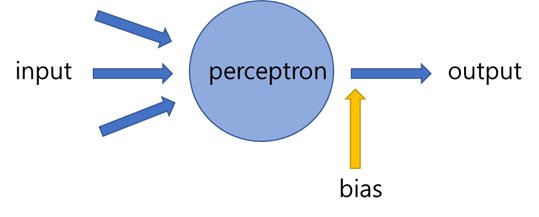

## Pooling

* 사용하는 이유
    * 이미지의 사이즈를 줄이기 위해서
    * fully conected 연산을 대체하기 위해서 average pooling 사용
    * 적당히 크기를 줄이고, 특정 feature를 강조하자.
    
    => 행렬의 크기는 감소하고, 채널 수의 변경은 없다


* max pooling : filter 안에서 가장 큰 값

    뉴런이 가장 큰 신호에 반응하는 것과 유사함.

    노이즈 감소, 속도 빠르고, 영상의 분별력 향상 효과

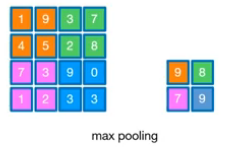



* average pooling : filter shpae의 평균값 사용
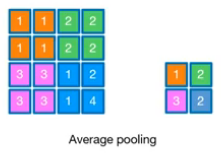

## MaxPool2d
torch.nn.MaxPool2d(kernel_size, strid=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)

## CNN implementation

In [16]:
# filter 생성
conv = nn.Conv2d(1, 5, 5)

# input
inputs = torch.Tensor(1, 1, 28, 28)

# pool 
pool = nn.MaxPool2d(2)

# output
out = conv(inputs)
print('before pooling size : ', out.shape)

out2 = pool(out)
print('after pooling size : ',out2.shape)


before pooling size :  torch.Size([1, 5, 24, 24])
after pooling size :  torch.Size([1, 5, 12, 12])


## Cross-Correlation  VS  Convolution

* Convolution : 뒤집고 계산
* Cross-Correlation : 안뒤집고 계산

# 실습_MNIST

## MNIST layer, shape 이해

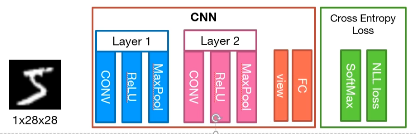

In [30]:
# input
inputs = torch.Tensor(1, 1, 28, 28)


# 첫번째 layer
# conv 생성
conv = nn.Conv2d(1, 32, 3, stride=1, padding= 1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)

# 두번째 layer
# conv2 생성
conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
#pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

out = conv(inputs)
print(out.shape)
out= pool(out)
print(out.shape)
out = conv2(out)
print(out.shape)
out = pool(out)
print(out.shape)


# view
out = out.view(out.size(0), -1)
print(out.shape)
fc = nn.Linear(3136, 10)
out = fc(out)
print(out.shape)

torch.Size([1, 32, 28, 28])
torch.Size([1, 32, 14, 14])
torch.Size([1, 64, 14, 14])
torch.Size([1, 64, 7, 7])
torch.Size([1, 3136])
torch.Size([1, 10])


## MINST 실습_1 
layer가 2개

In [63]:
# Lab 11 MNIST and Convolutional Neural Network
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init


# GPU 사용 설정
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [34]:
torch.cuda.is_available()

False

In [27]:
# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [28]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(), # input -> tensor 변환
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [29]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [45]:
class CNN(torch.nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__() 
        # layer1
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)        
    
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # layer2
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2))
        
        # 7 * 7 * 64 => 10
        self.fc = nn.Linear(7*7*64, 10, bias=True)
        # 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)
        
    
    def forward(self, x) :
        out = self.layer1(x)
        out = self.layer2(out)
        
        # view로 펼쳐주고 나머지는 한 줄로
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [46]:
model = CNN().to(device)

In [47]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [48]:
# training
total_batch = len(data_loader)

for epoch in range(training_epochs) :
    avg_cost = 0
    
    for X, Y in data_loader :

        X = X.to(device) 
        Y = Y.to(device)
        
        # 꼭 넣어야 학습이 된다.
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
        
    print('[Epoch : {}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!')

[Epoch : 1] cost = 0.22947098314762115
[Epoch : 2] cost = 0.063700370490551
[Epoch : 3] cost = 0.047062791883945465
[Epoch : 4] cost = 0.03748336806893349
[Epoch : 5] cost = 0.030879812315106392
[Epoch : 6] cost = 0.025973813608288765
[Epoch : 7] cost = 0.021702397614717484
[Epoch : 8] cost = 0.017509259283542633
[Epoch : 9] cost = 0.016355516389012337
[Epoch : 10] cost = 0.013759185560047626
[Epoch : 11] cost = 0.01121358573436737
[Epoch : 12] cost = 0.009585489518940449
[Epoch : 13] cost = 0.008215128444135189
[Epoch : 14] cost = 0.0076744710095226765
[Epoch : 15] cost = 0.006554662249982357
Learning Finished!


In [49]:
with torch.no_grad() :
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy : ', accuracy.item())

C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy :  0.9879999756813049


## MINST 실습_2
layer가 2개일 때 accuracy 가 98.8 % 정도인데 layer를 더 깊게 쌓으면 어떨까 ?
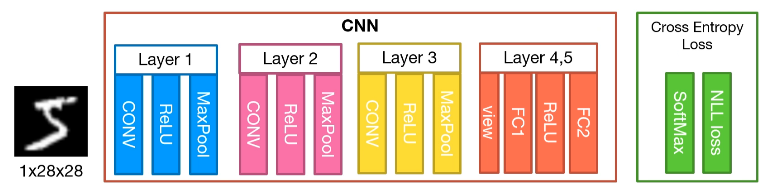

In [50]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        
        
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        
        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.Dropout(p=1 - self.keep_prob))
        
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.fc2(out)
        return out

In [51]:
# instantiate CNN model
model = CNN().to(device)


# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [52]:
# train my model
total_batch = len(data_loader)
model.train()    # set the model to train mode (dropout=True)
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in data_loader:
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded
        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

print('Learning Finished!')

Learning started. It takes sometime.
[Epoch:    1] cost = 0.189599812
[Epoch:    2] cost = 0.0516697466
[Epoch:    3] cost = 0.0361870714
[Epoch:    4] cost = 0.026572872
[Epoch:    5] cost = 0.0243368726
[Epoch:    6] cost = 0.0187436249
[Epoch:    7] cost = 0.0160000883
[Epoch:    8] cost = 0.0139999008
[Epoch:    9] cost = 0.0135356635
[Epoch:   10] cost = 0.00928898156
[Epoch:   11] cost = 0.0109749148
[Epoch:   12] cost = 0.00919569377
[Epoch:   13] cost = 0.00912082568
[Epoch:   14] cost = 0.00612443872
[Epoch:   15] cost = 0.00767205888
Learning Finished!


In [53]:
# Test model and check accuracy
with torch.no_grad():
    model.eval()    # set the model to evaluation mode (dropout=False)

    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

Accuracy: 0.9535999894142151


# 실습_MNIST, visdom 학습 후 적용하기

Visdom은 라이브 데이터를 풍부하게 시각화 해주는 시각화 도구입니다.  연구원과 개발자가 원격 서버에서 과학 실험을 지속적으로 할 수 있도록 도와주며, 브라우저에서 실행되며 다른 사람과 쉽게 공유할 수 있습니다.

## session 연결

http://localhost:8097/

In [56]:
import visdom

vis = visdom.Visdom()

Setting up a new session...


In [73]:
# 전부 종료
vis.close(env='main')

''

## Text

In [58]:
vis.text('안녕~~~~~~~~~~~ 반가왕~~~~~~~~', env='main')

'window_38ee62d0af9b6c'

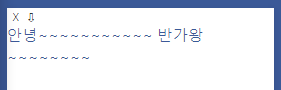

## Image

In [70]:
a = torch.randn(3, 200, 200)
vis.image(a)

'window_38ee63c42b2e4a'

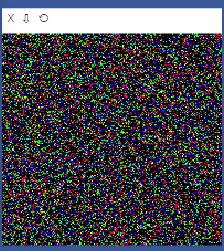

In [71]:
vis.images(torch.Tensor(3,3,28,28))

'window_38ee63c6542a46'

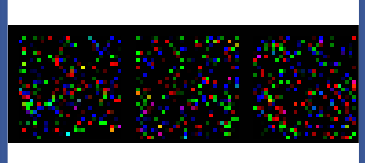

## Example

### CIFAR10

In [67]:
cifar10 = dsets.CIFAR10(root="./cifar10", train=True,
                       transform=transforms.ToTensor(),
                       download=True)

data = cifar10.__getitem__(0)
print(data[0].shape)
vis.images(data[0], env='main')

14.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

38.5%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

62.1%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

84.8%IOPub

Extracting ./cifar10\cifar-10-python.tar.gz to ./cifar10
torch.Size([3, 32, 32])


'window_38ee63920d7504'

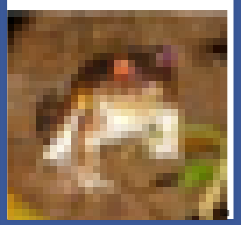

### MNIST 한 개만 출력

In [69]:
MNIST = dsets.MNIST(root="./MNIST_data",train = True,
                    transform=torchvision.transforms.ToTensor(),
                    download=True)
data = MNIST.__getitem__(0)
print(data[0].shape)
vis.images(data[0],env="main")


torch.Size([1, 28, 28])


'window_38ee63b9c44fd0'

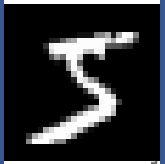

### MNIST 32개 다 보기

In [72]:
data_loader = torch.utils.data.DataLoader(dataset = MNIST,
                                         batch_size = 32,
                                         shuffle = False)

for num, value in enumerate(data_loader) :
    value = value[0]
    print(value.shape)
    vis.images(value)
    break

torch.Size([32, 1, 28, 28])


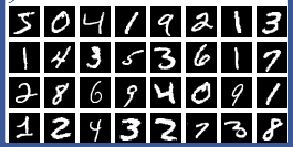

## Line Plot
loss가 어떻게 줄어들고 있는지 등에 대해 실시간으로 그림을 그려보자

In [84]:
Y_data = torch.randn(5)
plt = vis.line (Y=Y_data)

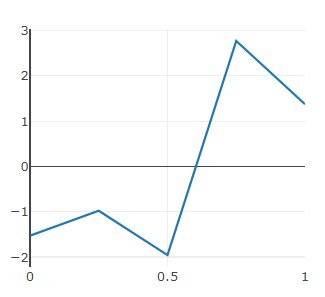

In [89]:
# x축의 값을 입력해준다
X_data = torch.Tensor([1,2,3,4,5])
plt = vis.line(Y=Y_data, X=X_data)

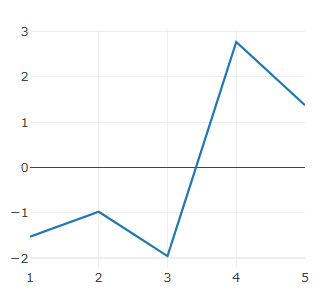

### Line update

In [90]:
# 데이터를 추가해보자
Y_append = torch.randn(1)
X_append = torch.Tensor([6])

vis.line(Y=Y_append, X=X_append, win=plt, update='append')

'window_38ee6d45cfe19c'

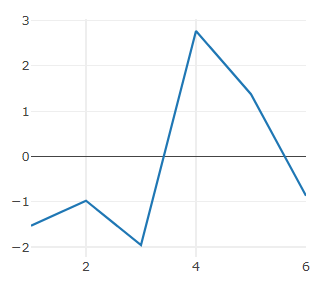

### multiple Line on single windows

In [91]:
num = torch.Tensor(list(range(0,10)))
print(num.shape)
num = num.view(-1,1)
print(num.shape)
num = torch.cat((num,num),dim=1)
print(num.shape)

# 라인을 두 개 그리기 위해서는 똑같은 shape 값을 넣어야한다.
plt = vis.line(Y=torch.randn(10,2), X = num)

torch.Size([10])
torch.Size([10, 1])
torch.Size([10, 2])


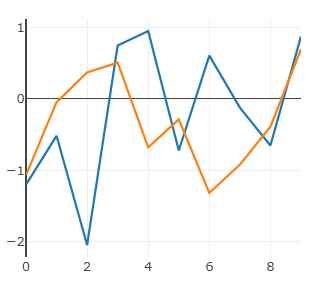

### Line info

In [93]:
plt = vis.line(Y=Y_data, X=X_data, opts = dict(title='Test', showlegend=True))

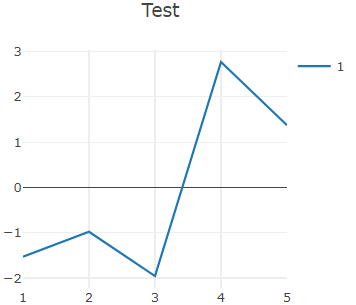

In [94]:
plt = vis.line(Y=Y_data, X=X_data, opts = dict(title='Test', legend = ['1번'],showlegend=True))

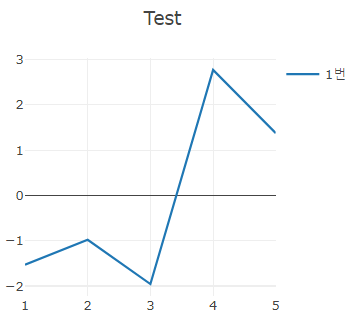

In [95]:

plt = vis.line(Y=torch.randn(10,2), X = num, opts=dict(title='Test', legend=['1번','2번'],showlegend=True))

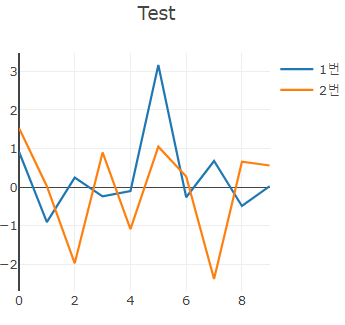

### make function for update line

In [96]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )

In [97]:
plt = vis.line(Y=torch.Tensor(1).zero_())

# 실시간으로 그림 그려보기
for i in range(500):
    loss = torch.randn(1) + i
    loss_tracker(plt, loss, torch.Tensor([i]))

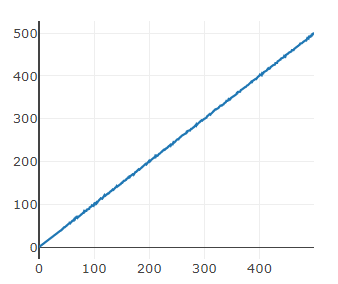

## MNIST-CNN with Visdom

In [99]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import torch.nn.init

In [100]:
import visdom

vis = visdom.Visdom()
vis.close(env="main")

Setting up a new session...


''

### define loss_tracker



In [101]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )

In [102]:
#parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 32

In [103]:
#MNIST dataset

mnist_train = dsets.MNIST(root='MNIST_data/',
                         train = True,
                         transform=transforms.ToTensor(),
                         download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                        train=False,
                        transform = transforms.ToTensor(),
                        download=True)

In [104]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size = batch_size,
                                          shuffle =True,
                                          drop_last=True)

In [105]:
class CNN(nn.Module):
    
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.layer3 = nn.Sequential(
            nn.Conv2d(64,128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(3*3*128, 625)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(625, 10, bias =True)
        torch.nn.init.xavier_uniform_(self.fc1.weight)
        torch.nn.init.xavier_uniform_(self.fc2.weight)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [106]:
model = CNN().to(device)

value = (torch.Tensor(1,1,28,28)).to(device)
print( (model(value)).shape )

torch.Size([1, 10])


In [107]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [108]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),
                    opts=dict(title='loss_tracker', 
                              legend=['loss'], 
                              showlegend=True))

In [109]:
#training
total_batch = len(data_loader)

for epoch in range(training_epochs):
    avg_cost = 0
    
    for X, Y in data_loader:
        X = X.to(device)
        Y = Y.to(device)
        
        optimizer.zero_grad()
        hypothesis = model(X)
        
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()
        
        avg_cost += cost / total_batch
    
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
    loss_tracker(loss_plt, torch.Tensor([avg_cost]), torch.Tensor([epoch]))
print('Learning Finished!')

[Epoch:1] cost = 0.11899332702159882
[Epoch:2] cost = 0.03967796266078949
[Epoch:3] cost = 0.027979854494333267
[Epoch:4] cost = 0.020634885877370834
[Epoch:5] cost = 0.01638784073293209
[Epoch:6] cost = 0.014542033895850182
[Epoch:7] cost = 0.012218721210956573
[Epoch:8] cost = 0.010586366057395935
[Epoch:9] cost = 0.009541076608002186
[Epoch:10] cost = 0.008283264935016632
[Epoch:11] cost = 0.00924240704625845
[Epoch:12] cost = 0.009141341783106327
[Epoch:13] cost = 0.006911531090736389
[Epoch:14] cost = 0.007196224760264158
[Epoch:15] cost = 0.00556139275431633
Learning Finished!


In [110]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(len(mnist_test), 1, 28, 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    
    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean() 
    print('Accuracy:', accuracy.item())

C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torchvision\datasets\mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Accuracy: 0.9638000130653381


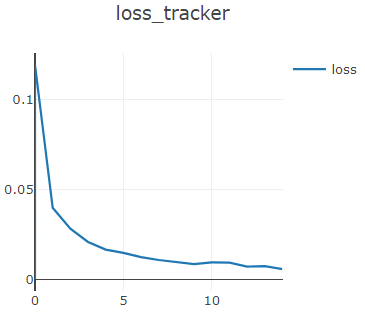

# 실습_개인 데이터셋

In [133]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

from torch.utils.data import DataLoader

from matplotlib.pyplot import imshow
%matplotlib inline

## train, test set 분리

In [179]:
trans = transforms.Compose([
    transforms.Resize((64, 128))
])

train_data = torchvision.datasets.ImageFolder(root = "./custom_data/origin_data",
                                           transform=trans)

In [180]:
for num, value in enumerate(train_data):
    data, label = value
    print(num, data, label)
    
    if(label == 0):
        data.save('custom_data/train_data/gray/%d_%d.jpeg'%(num, label))
    
    else:
        data.save('custom_data/train_data/red/%d_%d.jpeg'%(num, label))

0 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
1 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 0
2 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 0
3 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811EB0> 0
4 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 0
5 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 0
6 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 0
7 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 0
8 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 0
9 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 0
10 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
11 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 0
12 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 0
13 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 0
14 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
15 <P

165 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811EB0> 0
166 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 0
167 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 0
168 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 0
169 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
170 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 0
171 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
172 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 0
173 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 0
174 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 0
175 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 0
176 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 0
177 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 0
178 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 0
179 <PIL.Image.Image image mode=RGB size=128x64 

331 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 1
332 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 1
333 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 1
334 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 1
335 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811F70> 1
336 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 1
337 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 1
338 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 1
339 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 1
340 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 1
341 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 1
342 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 1
343 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 1
344 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 1
345 <PIL.Image.Image image mode=RGB size=128x64 

484 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811EB0> 1
485 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 1
486 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 1
487 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 1
488 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 1
489 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 1
490 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811EB0> 1
491 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811DF0> 1
492 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B7418114C0> 1
493 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 1
494 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811B50> 1
495 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811460> 1
496 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811D90> 1
497 <PIL.Image.Image image mode=RGB size=128x64 at 0x1B741811FA0> 1
498 <PIL.Image.Image image mode=RGB size=128x64 

## train data

In [203]:
trans = transforms.Compose([
    transforms.ToTensor() ])

train_data = torchvision.datasets.ImageFolder(root='./custom_data/train_data',
                                             transform=trans)

data_loader = DataLoader(dataset = train_data, 
                        batch_size = 8,
                        shuffle = True,
                        num_workers=2)

In [204]:
class CNN(nn.Module) :
    
    def __init__(self) :
        super(CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 6, 5), # 입력 3, 출력 6, 필터 5
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, 5), # 입력 6, 출력 16, 필터 5
            nn.ReLU(),
            nn.MaxPool2d(2),
        
        )
        
        # fully connected 2번 수행
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120, 2)
        )
        
        
    def forward(self, x) :
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.layer3(out)
        return out

In [205]:
# testing
net = CNN().to(device)
test_input = (torch.Tensor(3, 3, 64, 128)).to(device)
test_out = net(test_input)

optimizer = optim.Adam(net.parameters(), lr=0.00001)
loss_func = nn.CrossEntropyLoss().to(device)

In [206]:
total_batch = len(data_loader)

epochs = 500

for epoch in range(epochs) :
    avg_cost = 0.0
    for num, data in enumerate(data_loader) :
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
    loss_tracker(loss_plt, torch.Tensor([avg_cost]), torch.Tensor([epoch]))
print('Learning Finished!')

[Epoch:1] cost = 0.6838247179985046
[Epoch:2] cost = 0.6536505818367004
[Epoch:3] cost = 0.6109403371810913
[Epoch:4] cost = 0.5490846633911133
[Epoch:5] cost = 0.45063385367393494
[Epoch:6] cost = 0.3229270577430725
[Epoch:7] cost = 0.21329365670681
[Epoch:8] cost = 0.13642524182796478
[Epoch:9] cost = 0.0873306542634964
[Epoch:10] cost = 0.05708402022719383
[Epoch:11] cost = 0.039122700691223145
[Epoch:12] cost = 0.02891373820602894
[Epoch:13] cost = 0.02239757589995861
[Epoch:14] cost = 0.01774190366268158
[Epoch:15] cost = 0.014390268363058567
[Epoch:16] cost = 0.011787786148488522
[Epoch:17] cost = 0.00983475986868143
[Epoch:18] cost = 0.008267715573310852
[Epoch:19] cost = 0.00704021705314517
[Epoch:20] cost = 0.006029962562024593
[Epoch:21] cost = 0.005261618178337812
[Epoch:22] cost = 0.004593612626194954
[Epoch:23] cost = 0.004032245837152004
[Epoch:24] cost = 0.0035861164797097445
[Epoch:25] cost = 0.003213962772861123
[Epoch:26] cost = 0.002866085385903716
[Epoch:27] cost = 

[Epoch:204] cost = 6.489832458100864e-07
[Epoch:205] cost = 6.227912194844976e-07
[Epoch:206] cost = 5.903976330046135e-07
[Epoch:207] cost = 5.683086214958166e-07
[Epoch:208] cost = 5.478232765199209e-07
[Epoch:209] cost = 5.348659328774374e-07
[Epoch:210] cost = 5.10647851115209e-07
[Epoch:211] cost = 4.909342123937677e-07
[Epoch:212] cost = 4.837763185605581e-07
[Epoch:213] cost = 4.642169812996144e-07
[Epoch:214] cost = 4.440716168119252e-07
[Epoch:215] cost = 4.2667144839469984e-07
[Epoch:216] cost = 4.0954907376544725e-07
[Epoch:217] cost = 3.982266036928195e-07
[Epoch:218] cost = 3.831714820989873e-07
[Epoch:219] cost = 3.760757749660115e-07
[Epoch:220] cost = 3.524128544540872e-07
[Epoch:221] cost = 3.3902347240655217e-07
[Epoch:222] cost = 3.2730002885728027e-07
[Epoch:223] cost = 3.1557667057313665e-07
[Epoch:224] cost = 3.06907622871222e-07
[Epoch:225] cost = 2.9117347821738804e-07
[Epoch:226] cost = 2.825351259616582e-07
[Epoch:227] cost = 2.710585533804988e-07
[Epoch:228] 

[Epoch:402] cost = 2.1595884802660947e-10
[Epoch:403] cost = 2.1595884802660947e-10
[Epoch:404] cost = 2.1595884802660947e-10
[Epoch:405] cost = 4.3191769605321895e-10
[Epoch:406] cost = 2.1595884802660947e-10
[Epoch:407] cost = 2.1595884802660947e-10
[Epoch:408] cost = 2.1595884802660947e-10
[Epoch:409] cost = 2.1595884802660947e-10
[Epoch:410] cost = 0.0
[Epoch:411] cost = 2.1595884802660947e-10
[Epoch:412] cost = 2.1595884802660947e-10
[Epoch:413] cost = 2.1595884802660947e-10
[Epoch:414] cost = 0.0
[Epoch:415] cost = 0.0
[Epoch:416] cost = 2.1595884802660947e-10
[Epoch:417] cost = 0.0
[Epoch:418] cost = 2.1595884802660947e-10
[Epoch:419] cost = 0.0
[Epoch:420] cost = 2.1595884802660947e-10
[Epoch:421] cost = 0.0
[Epoch:422] cost = 0.0
[Epoch:423] cost = 0.0
[Epoch:424] cost = 0.0
[Epoch:425] cost = 0.0
[Epoch:426] cost = 0.0
[Epoch:427] cost = 0.0
[Epoch:428] cost = 0.0
[Epoch:429] cost = 0.0
[Epoch:430] cost = 0.0
[Epoch:431] cost = 0.0
[Epoch:432] cost = 0.0
[Epoch:433] cost = 0.

In [207]:
torch.save(net.state_dict(), './model/model.pth')

In [208]:
new_net = CNN().to(device)
new_net.load_state_dict(torch.load('./model/model.pth'))

<All keys matched successfully>

In [209]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([-0.0951,  0.0837,  0.0530,  0.1181, -0.0006], grad_fn=<SelectBackward>)
tensor([-0.0951,  0.0837,  0.0530,  0.1181, -0.0006], grad_fn=<SelectBackward>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]])

In [210]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='./custom_data/test_data', transform=trans)

In [211]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [212]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 1.0


# Advanced CNN ( VGG )

* VGG의 특징

    - AlexNet(2012)의 오차율을 절반으로 줄인 모델

    - 16, 19와 같은 layer가 깊은 신경망 모델

    - 3 x 3 filter만 사용


* 3 x 3 의 filter만 사용하여 layer가 깊은 신경망은 어떤 점이 좋을까 ?

    EX ) 10 x 10 의 input을 7 x 7, 3 x 3 의 filter로 convolution 해보자.
    
        1 ) 7 x 7 filter 사용한 결과 : 4 x 4
        
        2 ) 3 x 3 filter 사용한 결과 : 8 x 8 => 6 x 6 => 4 x 4


    같은 크기가 되기 까지 1)의 경우는 7x7=49의 연산, 2)의 경우는 3x3x3=27의 연산을 하므로
    2)의 경우에 훈련 개수가 작아 학습속도가 빨라지게 된다. 
    동시에 층의 갯수가 증가하면서 비선형성이 증가하여 특징의 식별성이 높아진다.

        - 층의 갯수가 증가하면 왜 비선형성이 증가 ?
        - 비선형성이 증가하면 왜 특징의 식별성이 높아지는지 ?

------------
------------


* VGG16 구성
    - 13 Convolution layers + 3 Fully Connected layers
    - 3 x 3 filters
    - stride = 1, padding = 1
    - 2 x 2 max pooling, stride = 2
    - ReLU 활성화 함수 사용
    
    
* 코드에서 conv3_64은 3 x 3 필터가 64개 있음을 의미한다.


* 3 FC 는 각각 4096, 4096, 1000 개의 유닛으로 구성된다.

    - 출력층은 classification을 위해 softmax 함수를 사용한다.
    - 4096, 4096, 1000 어디서 나온 숫자인가 ?
    
    
* VGG 구조
    - A, A-LRN, B, C, D, E
    - A와 A-LRN의 차이점은 Normalization,비교 결과 큰 성능차이를 보이지 않아서 이후 구조에서 적용하지 않음


* 여기에 더하여 Batch Normalizaion이 포함된 버전이 주로 활용된다.
    - Batch Normalization 의 역할 ?

## VGG 구현해보기

In [213]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

In [214]:
__all__ = [
    'VGG', 'vgg11', 'vgg11_bn', 'vgg13', 'vgg13_bn', 'vgg16', 'vgg16_bn',
    'vgg19_bn', 'vgg19',
]


model_urls = {
    'vgg11': 'https://download.pytorch.org/models/vgg11-bbd30ac9.pth',
    'vgg13': 'https://download.pytorch.org/models/vgg13-c768596a.pth',
    'vgg16': 'https://download.pytorch.org/models/vgg16-397923af.pth',
    'vgg19': 'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth',
    'vgg11_bn': 'https://download.pytorch.org/models/vgg11_bn-6002323d.pth',
    'vgg13_bn': 'https://download.pytorch.org/models/vgg13_bn-abd245e5.pth',
    'vgg16_bn': 'https://download.pytorch.org/models/vgg16_bn-6c64b313.pth',
    'vgg19_bn': 'https://download.pytorch.org/models/vgg19_bn-c79401a0.pth',
}

In [215]:
class VGG(nn.Module):
    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        
        self.features = features #convolution layer
        
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes),
        )#Fully Connected layer
        
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x) #Convolution 
        x = self.avgpool(x) # avgpool
        x = x.view(x.size(0), -1) #
        x = self.classifier(x) #FC layer
        return x

    def _initialize_weights(self):
        for m in self.modules():
            
            if isinstance(m, nn.Conv2d):
                # kaiming_normalizaion : 어떤 
                nn.init.kaiming_normal_(m.weight, 
                                        mode='fan_out', 
                                        nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
                    
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [216]:
# 'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']


def make_layers(cfg, batch_norm=False):
    layers = [] 
    in_channels = 3
    
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
                     
    return nn.Sequential(*layers)


# conv2d = nn.Conv2d(3, 64, kernel_size=3, padding=1) # 1
# nn.ReLU(inplace=True)
# nn.MaxPool2d(kernel_size=2, stride=2)

# conv2d = nn.Conv2d(64, 128, kernel_size=3, padding=1) # 2 
# nn.ReLU(inplace=True)
# nn.MaxPool2d(kernel_size=2, stride=2)

# conv2d = nn.Conv2d(128, 256, kernel_size=3, padding=1) # 3
# nn.ReLU(inplace=True)

# conv2d = nn.Conv2d(256, 256, kernel_size=3, padding=1) # 4
# nn.ReLU(inplace=True)

# nn.MaxPool2d(kernel_size=2, stride=2)

# conv2d = nn.Conv2d(256, 512, kernel_size=3, padding=1) # 5
# nn.ReLU(inplace=True)

# conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1) # 6
# nn.ReLU(inplace=True)

# nn.MaxPool2d(kernel_size=2, stride=2)

# conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1) # 7
# nn.ReLU(inplace=True)

# conv2d = nn.Conv2d(512, 512, kernel_size=3, padding=1) # 8
# nn.ReLU(inplace=True)

# nn.MaxPool2d(kernel_size=2, stride=2)

In [217]:
cfg = {
    'A': [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], #8 + 3 =11 == vgg11
    'B': [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M'], # 10 + 3 = vgg 13
    'D': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M', 512, 512, 512, 'M'], #13 + 3 = vgg 16
    'E': [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'], # 16 +3 =vgg 19
    'custom' : [64,64,64,'M',128,128,128,'M',256,256,256,'M'] # 내가 원하는 것들을 넣어주기 위해서
}

In [218]:
conv = make_layers(cfg['A']) #  cfg[] 안의 값들을 변경해보자
conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace=True)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=

In [219]:
conv = make_layers(cfg['custom']) #  cfg[] 안의 값들을 변경해보자
conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): ReLU(inplace=True)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (10): ReLU(inplace=True)
  (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace=True)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): Conv2d(2

In [224]:
conv = make_layers(cfg['custom'], batch_norm=True) 
# batch_norm을 추가하면 Conv2d 뒤에 batch_norm이 붙게된다.
# batch_norm의 역할 ?
conv

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace=True)
  (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace=True)
  (13): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats

In [226]:
CNN = VGG(make_layers(cfg['custom']), num_classes=10, init_weights=True)
CNN

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), paddin

[WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다
[WinError 10054] 현재 연결은 원격 호스트에 의해 강제로 끊겼습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다
[WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니

## 실습_cifar10

In [228]:
import visdom

vis = visdom.Visdom()

Setting up a new session...


In [229]:
def loss_tracker(loss_plot, loss_value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=loss_value,
             win = loss_plot,
             update='append'
             )

In [230]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [232]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=512,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [233]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
vis.images(images/2 + 0.5)

# show images
#imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

truck   dog horse truck


## make VGG16 using vgg.py

In [234]:
# import vgg
import torchvision.models.vgg as vgg

In [235]:
cfg = [32,32,'M', 64,64,128,128,128,'M',256,256,256,512,512,512,'M'] #13 + 3 =vgg16

In [236]:
class VGG(nn.Module):

    def __init__(self, features, num_classes=1000, init_weights=True):
        super(VGG, self).__init__()
        self.features = features
        #self.avgpool = nn.AdaptiveAvgPool2d((7, 7)) 
        # 내 이미지가 7,7 보다 크면 관계없는데 작은 경우에는 쓰지 않는 것이 좋다. 따라서 사용하지 않음
        self.classifier = nn.Sequential(
            
            nn.Linear(512 * 4 * 4, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(),
            
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        # x = self.avgpool(x) # 제외하고 진행
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [237]:
vgg16= VGG(vgg.make_layers(cfg),10,True).to(device)

In [238]:
a=torch.Tensor(1,3,32,32).to(device)
out = vgg16(a)
print(out)

tensor([[-0.0012,  0.0020, -0.0097,  0.0104,  0.0138,  0.0131,  0.0021, -0.0011,
          0.0063, -0.0057]], grad_fn=<AddmmBackward>)


In [239]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(vgg16.parameters(), lr = 0.005,momentum=0.9)

# learning rate scheduler : lr을 약간씩 감소시켜 정밀한 학습을 돕는다
# step_size 만큼 할 때마다 learning rate * gamma 로 lr 업데이트
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)

In [240]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),
                    opts=dict(title='loss_tracker', 
                              legend=['loss'], 
                              showlegend=True))

In [241]:
print(len(trainloader))
epochs = 50

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = vgg16(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            loss_tracker(loss_plt, 
                         torch.Tensor([running_loss/30]), 
                         torch.Tensor([i + epoch*len(trainloader) ]))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
        

print('Finished Training')

98


C:\Users\won\anaconda3\envs\cpu_env\lib\site-packages\torch\optim\lr_scheduler.py:118: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


[1,    30] loss: 2.302
[1,    60] loss: 2.299
[1,    90] loss: 2.286
[2,    30] loss: 2.210
[2,    60] loss: 2.136
[2,    90] loss: 2.077
[3,    30] loss: 1.994
[3,    60] loss: 1.898
[3,    90] loss: 1.815
[4,    30] loss: 1.722
[4,    60] loss: 1.675
[4,    90] loss: 1.619
[5,    30] loss: 1.567
[5,    60] loss: 1.524
[5,    90] loss: 1.511
[6,    30] loss: 1.494
[6,    60] loss: 1.445
[6,    90] loss: 1.419
[7,    30] loss: 1.395
[7,    60] loss: 1.376
[7,    90] loss: 1.355
[8,    30] loss: 1.307
[8,    60] loss: 1.285
[8,    90] loss: 1.241
[9,    30] loss: 1.212
[9,    60] loss: 1.194
[9,    90] loss: 1.175
[10,    30] loss: 1.120
[10,    60] loss: 1.107
[10,    90] loss: 1.101
[11,    30] loss: 1.080
[11,    60] loss: 1.081
[11,    90] loss: 1.028
[12,    30] loss: 1.012
[12,    60] loss: 1.009
[12,    90] loss: 0.989
[13,    30] loss: 0.977
[13,    60] loss: 0.949
[13,    90] loss: 0.949
[14,    30] loss: 0.901
[14,    60] loss: 0.904
[14,    90] loss: 0.901
[15,    30] loss: 0

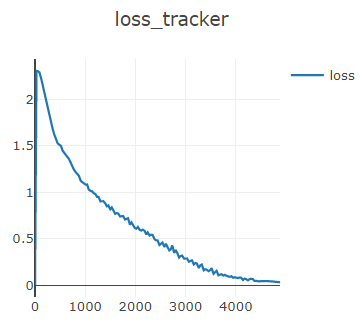

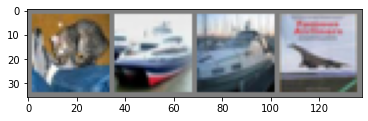

GroundTruth:    cat  ship  ship plane


In [242]:
dataiter = iter(testloader) # 다음 요소 출력
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [243]:
outputs = vgg16(images.to(device))

In [244]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [245]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = vgg16(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 76 %


# Advanced CNN (ResNet)

전체 모델은 모두 
import torchvision.models.resnet as resnet

res = resnet.resnet50() # 18, 50, 152  로 쉽게 사용할 수 있다.

어떻게 만들어졌는지 확인해보자.


## ResNet 구현해보기

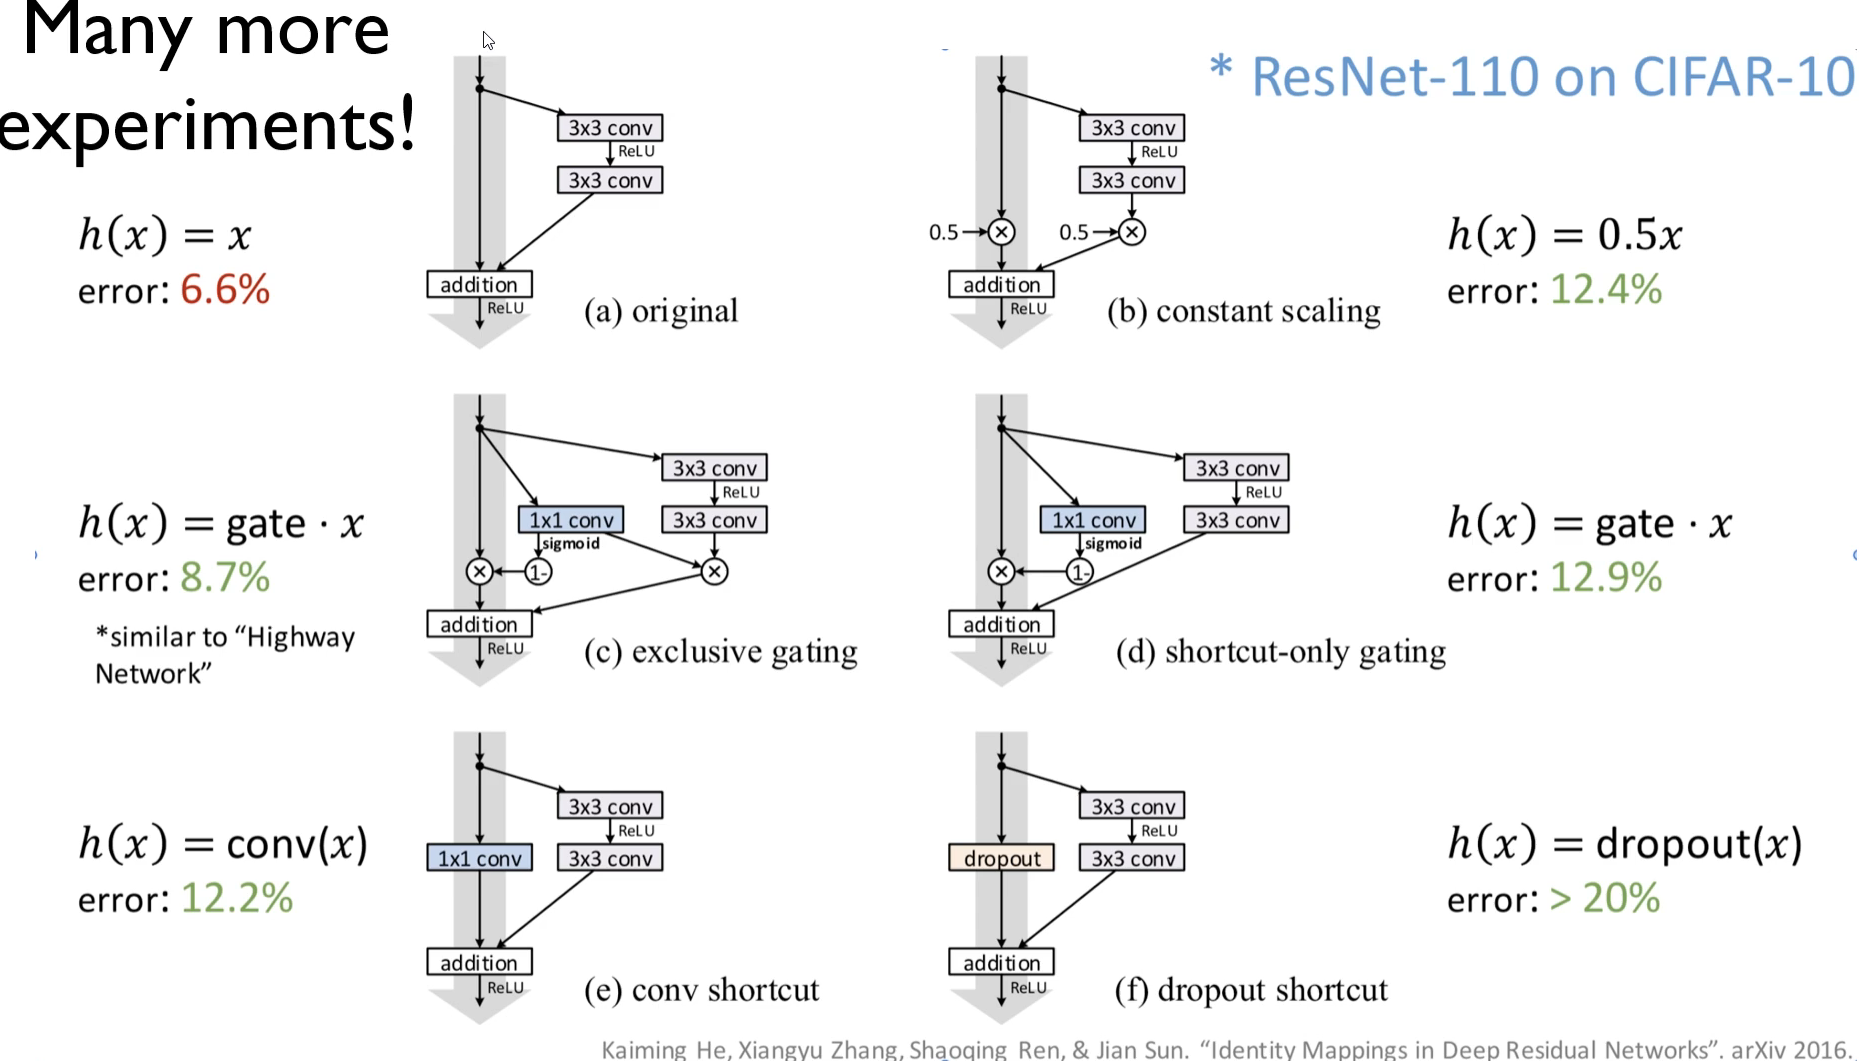

In [2]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}

In [3]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)

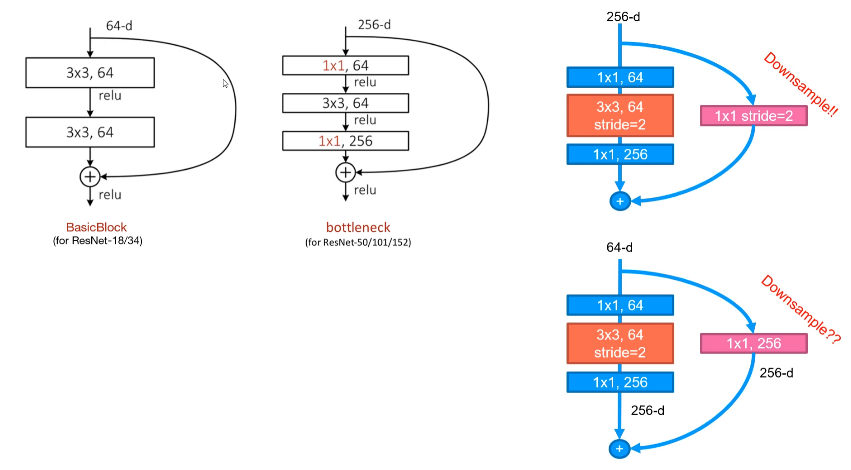

### BassicBlock

In [18]:
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):

        identity = x

        out = self.conv1(x) # 3x3 stride = 2
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out) # 3x3 stride = 1
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
 

#### downsample을 사용하는 이유

만약, x.shape = 3 x 64 x 64일 경우에


identity = 3 x 64 x 64

--------

(3x3 stride = 2)

out = self.conv1(x) # out.shape = 3 x 32 x 32

out = self.bn1(out) 

out = self.relu(out) # out.shape = 3 x 32 x 32

--------

(3x3 stride = 1)

out = self.conv2(out) # out.shape = 3 x 32 x 32

out = self.bn2(out) # out.shape = 3 x 32 x 32

--------

여기에서 out과 identity가 덧셈이 불가능한 상태이기 때문에
이를 해결하기 위해 downsample을 사용한다.

### Bottleneck Block

In [19]:
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes) #conv1x1(64,64)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)#conv3x3(64,64)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion) #conv1x1(64,256)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x) # 1x1 stride = 1
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out) # 3x3 stride = stride 
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out) # 1x1 stride = 1
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

### ResNet

In [20]:
class ResNet(nn.Module):
    # model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs) #resnet 50 
    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        
        ## make_layers에 사용하는 값
        self.inplanes = 64
               
        # input = 64 x 224 x 224 
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        # output = self.conv1(inputs)
        
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        # output.shpae = 64 x 112 x 112 ( input + 2 * padding - kernel_size + 1 ) / 2
        
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        # output.shape =  64 X 56 X 56
        
        self.layer1 = self._make_layer(block, 64, layers[0]) # 3
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2) # 4
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2) # 5
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2) # 6
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        
        # range 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        # 실행 하면 모델의 성능이 0.2 ~ 0.3 % 정도 향상된다.
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)
    
    
    
    # self.layer1 = self._make_layer(Bottleneck, 64, 3)
    # self.layer2 = self._make_layer(Bottleneck, 128, 4, stride=2)
    def _make_layer(self, block, planes, blocks, stride=1):
        
        downsample = None
        
        # self.inplanes != planes * block.expansion 
        # 64 != 64 * 4
        if stride != 1 or self.inplanes != planes * block.expansion: 
            
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride), #conv1x1(64, 256, 1) #conv1x1(256, 512, 2)  
                nn.BatchNorm2d(planes * block.expansion), # batchnrom2d(256) # batchnrom2d(512)
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        # layers.append(Bottleneck(64, 64, 1, downsample))
        
        self.inplanes = planes * block.expansion #self.inplanes = 64 * 4 = 256 # self.inplanes = 128 * 4
        
        
        for _ in range(1, blocks): 
        # for _ in range(1, 3) # layer1
        # for _ in range(1, 4) # layer2
            layers.append(block(self.inplanes, planes)) # * 2 # * 3

        return nn.Sequential(*layers)
    
    # self.layer1 = [
        # bottleneck(64, 64, 1, downsample)
        # bottleneck(256, 64)
        # bottleneck(256, 256)
    # ]
    
    # self.layer2 = [
        # bottleneck(256,128, 2, downsample)
        # bottleneck(512, 128)
        # bottleneck(512, 128)
        # bottleneck(512, 128)
    # ]    

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [21]:
# 18은 basic block
def resnet18(pretrained=False, **kwargs):
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs) #=> 2*(2+2+2+2) +1(conv1) +1(fc)  = 16 +2 =resnet 18
    return model

# 각 블락을 2개씩 만들기 때문에 2 * ( 2 + 2 + 2 + 2)
# 맨앞에 conv 1 
# 맨뒤에 fc

In [22]:
# 50은 bottleneck
def resnet50(pretrained=False, **kwargs):
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs) #=> 3*(3+4+6+3) +(conv1) +1(fc) = 48 +2 = 50
    return model

# 1x1, 3x3, 1x1 의 총 세개가 있으므로 3 * ( 3 + 4 + 6 + 3) 
# conv1
# fc 

In [23]:
def resnet152(pretrained=False, **kwargs):
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs) # 3*(3+8+36+3) +2 = 150+2 = resnet152    
    return mode

In [24]:
res = resnet18()
res

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## 실습_cifar10

In [1]:
import torch
import torch.nn as nn

import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

In [2]:
import visdom

vis = visdom.Visdom()
vis.close(env="main")

Setting up a new session...


''

In [3]:
def value_tracker(value_plot, value, num):
    '''num, loss_value, are Tensor'''
    vis.line(X=num,
             Y=value,
             win = value_plot,
             update='append'
             )

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
transform = transforms.Compose([
    transforms.ToTensor()
])

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True, download=True, transform=transform)

print(trainset.data.shape)

train_data_mean = trainset.data.mean( axis=(0,1,2) ) # 각 축의 평균
train_data_std = trainset.data.std( axis=(0,1,2) ) # 각 축의 표준편차


print(train_data_mean)
print(train_data_std)

train_data_mean = train_data_mean / 255
train_data_std = train_data_std / 255

print(train_data_mean)
print(train_data_std)

Files already downloaded and verified
(50000, 32, 32, 3)
[125.30691805 122.95039414 113.86538318]
[62.99321928 62.08870764 66.70489964]
[0.49139968 0.48215841 0.44653091]
[0.24703223 0.24348513 0.26158784]


In [6]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize(train_data_mean, train_data_std)
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_data_mean, train_data_std)
])

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256,
                                          shuffle=True, num_workers=0)

testset = torchvision.datasets.CIFAR10(root='./cifar10', train=False,
                                       download=True, transform=transform_test)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                         shuffle=False, num_workers=0)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
import torchvision.models.resnet as resnet

In [8]:
conv1x1=resnet.conv1x1
Bottleneck = resnet.Bottleneck
BasicBlock= resnet.BasicBlock

In [9]:
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 16 # 사이즈가 작은 편이므로 작게 만든다.
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)
        #self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1) # 사이즈가 작은 편이므로 진행하지 않음
         
        
        self.layer1 = self._make_layer(block, 16, layers[0], stride=1)
        self.layer2 = self._make_layer(block, 32, layers[1], stride=1)
        self.layer3 = self._make_layer(block, 64, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 128, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(128 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        #x.shape =[1, 16, 32,32]
        x = self.bn1(x)
        x = self.relu(x)
        #x = self.maxpool(x)

        x = self.layer1(x)
        #x.shape =[1, 128, 32,32]
        x = self.layer2(x)
        #x.shape =[1, 256, 32,32]
        x = self.layer3(x)
        #x.shape =[1, 512, 16,16]
        x = self.layer4(x)
        #x.shape =[1, 1024, 8,8]
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [10]:
resnet50 = ResNet(resnet.Bottleneck, [3, 4, 6, 3], 10, True).to(device) 
#1(conv1) + 9(layer1) + 12(layer2) + 18(layer3) + 9(layer4) +1(fc)= ResNet50

In [11]:
resnet50

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_ru

### test

In [12]:
a=torch.Tensor(1,3,32,32).to(device)
out = resnet50(a)
print(out)

tensor([[ 0.0338,  0.0122,  0.0168, -0.0428, -0.0382, -0.0435, -0.0441,  0.0176,
         -0.0341, -0.0110]], grad_fn=<AddmmBackward>)


### parameter 조정

In [13]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(resnet50.parameters(), lr = 0.1, momentum = 0.9, weight_decay=5e-4)
lr_sche = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

### plot

In [14]:
loss_plt = vis.line(Y=torch.Tensor(1).zero_(),opts=dict(title='loss_tracker', legend=['loss'], showlegend=True))
acc_plt = vis.line(Y=torch.Tensor(1).zero_(),opts=dict(title='Accuracy', legend=['Acc'], showlegend=True))

### 정확도 확인

In [15]:
def acc_check(net, test_set, epoch, save=1):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_set:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)

            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    acc = (100 * correct / total)
    print('Accuracy of the network on the 10000 test images: %d %%' % acc)
    if save:
        torch.save(net.state_dict(), "./model/model_epoch_{}_acc_{}.pth".format(epoch, int(acc)))
    return acc

### train

In [17]:
print(len(trainloader))
epochs = 100

for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    lr_sche.step()
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = resnet50(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 30 mini-batches
            value_tracker(loss_plt, torch.Tensor([running_loss/30]), torch.Tensor([i + epoch*len(trainloader) ]))
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 30))
            running_loss = 0.0
    
    #Check Accuracy
    acc = acc_check(resnet50, testloader, epoch, save=1)
    value_tracker(acc_plt, torch.Tensor([acc]), torch.Tensor([epoch]))
    

print('Finished Training')

# 84 % 에서 성능이 개선되지 않아 학습을 임의로 중단함
# 23 batch 까지 약 15시간

196
[1,    30] loss: 2.081
[1,    60] loss: 1.895
[1,    90] loss: 1.788
[1,   120] loss: 1.699
[1,   150] loss: 1.639
[1,   180] loss: 1.568
Accuracy of the network on the 10000 test images: 42 %
[2,    30] loss: 1.487
[2,    60] loss: 1.455
[2,    90] loss: 1.425
[2,   120] loss: 1.364
[2,   150] loss: 1.317
[2,   180] loss: 1.289
Accuracy of the network on the 10000 test images: 50 %
[3,    30] loss: 1.182
[3,    60] loss: 1.185
[3,    90] loss: 1.135
[3,   120] loss: 1.096
[3,   150] loss: 1.062
[3,   180] loss: 1.050
Accuracy of the network on the 10000 test images: 58 %
[4,    30] loss: 0.992
[4,    60] loss: 1.011
[4,    90] loss: 0.980
[4,   120] loss: 0.897
[4,   150] loss: 0.910
[4,   180] loss: 0.897
Accuracy of the network on the 10000 test images: 61 %
[5,    30] loss: 0.899
[5,    60] loss: 0.866
[5,    90] loss: 0.869
[5,   120] loss: 0.827
[5,   150] loss: 0.847
[5,   180] loss: 0.808
Accuracy of the network on the 10000 test images: 66 %
[6,    30] loss: 0.796
[6,    6

KeyboardInterrupt: 

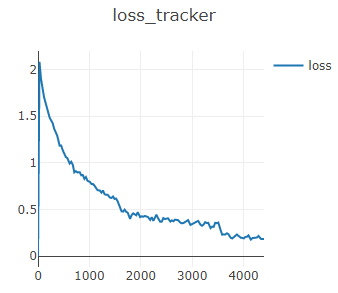

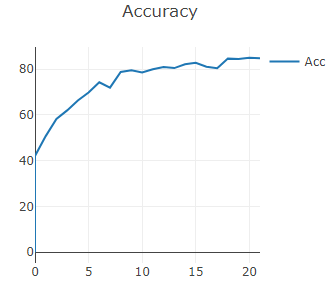

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = resnet50(images)
        
        _, predicted = torch.max(outputs.data, 1)
        
        total += labels.size(0)
        
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

batch, randomcrop, normalize 등을 변경하여 정확도를 최고 92%까지 올려볼 수 있다.
해보기 !

# 추가로 공부해볼 수 있는 CNN

Classification
- object detection : 사진 안에 객체가 어디에 있는지, 무엇인지 찾아낸다
- object tracking : 이전, 현재 frame의 객체를 찾아냈다면 전의 객체가 다음 frame에서 어떤 객체인지 labeling 하며 tracking 
- segmentation : 배경과 객체가 분할된다

Classification : DenseNet, SENet, MobileNet, SqueezeNet, AutoML(NAS, NASNet)

    - MobileNet, SqueezeNet : 크기를 압축해서 모바일에서 사용할 수 있도록
    - Neural Architecture Search with Reinforcement learning
    
Detection : Latest Object Detection 구글에 검색해보기

Track : MDNet, GOTURN, CFNet, ROLO, Tracking the Untrackable

Segmentation : FCN, U-Net, Mask RCNN


* Classification
* Detection
* Tracking => SiamessCNN(Object-ReID)
* Segmentaion
* Image Captioning : RNN 이후 학습
* Super Resolution : 저해상도 -> 고해상도
* Generative Model(AutoEncoder, GAN) : 생성 모델
* OpenPose : 사람의 관절 구조를 파악할 수 있음